# Analysis using `Xarray`

This notebooks demonstrates some features of `xarray` that are useful for Climate Data Analysis, including:

1. Reading in multiple files at a time
2. Averaging over dimensions to calculate an average in space, time, or over ensemble members
3. Calculating a climatology and anomalies for monthly data

## Monthly Data

In this notebook, we will work with monthly data as an example. 

We will return to the CMIP5 data, this time for surface temperature (ts), which corresponds to sea surface temperature over the ocean, from the RCP4.5 scenario produced by the NCAR/CCSM4 model. This time, we will read in all of the ensemble members at one time.

The data are located on the COLA severs in the following directory:
```/shared/cmip5/data/rcp45/atmos/mon/Amon/tas/NCAR.CCSM4/r*i1p1/```

The filename is:
```tas_Amon_CCSM4_rcp45_r*i1p1_210101-229912.nc```

The ensemble members are indicated by: r1i1p1, r2i1p1, r3i1p1, r4i1p1, r5i1p1, r6i1p1 in the directory and filename.  

In `xr.open_mfdataset`, we can simply use `*` in the filename and directory name to indicate all the ensemble members.

In [49]:
import warnings

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
warnings.filterwarnings("ignore")

## Read multiple files using `xr.open_mfdataset`

Set the path and filename using `*` for the ensemble members

In [51]:
path='/shared/cmip5/data/rcp45/atmos/mon/Amon/ts/NCAR.CCSM4/r*i1p1/'
fname='ts_Amon_CCSM4_rcp45_r*i1p1_200601-210012.nc'

Read the data

In [52]:
ds=xr.open_mfdataset(path+fname,concat_dim='ensemble',combine='nested',decode_times=True)
print(path+fname)

/shared/cmip5/data/rcp45/atmos/mon/Amon/ts/NCAR.CCSM4/r*i1p1/ts_Amon_CCSM4_rcp45_r*i1p1_200601-210012.nc


When reading the data, we need to tell `xarray` how to put the data together.  Here, I told it to create a new dimension called `ensemble` for combining the data. 

In [53]:
ds

<xarray.Dataset>
Dimensions:    (bnds: 2, ensemble: 6, lat: 382, lon: 288, time: 1140)
Coordinates:
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) object 2006-01-16 12:00:00 ... 2100-12-16 12:00:00
  * lat        (lat) float64 -90.0 -89.06 -89.06 -88.12 ... 89.06 89.06 90.0
Dimensions without coordinates: bnds, ensemble
Data variables:
    time_bnds  (ensemble, time, bnds) object dask.array<chunksize=(1, 1140, 2), meta=np.ndarray>
    lat_bnds   (ensemble, lat, bnds) float64 dask.array<chunksize=(1, 382, 2), meta=np.ndarray>
    lon_bnds   (ensemble, lon, bnds) float64 dask.array<chunksize=(1, 288, 2), meta=np.ndarray>
    ts         (ensemble, time, lat, lon) float32 dask.array<chunksize=(1, 1140, 382, 288), meta=np.ndarray>
Attributes:
    institution:                  NCAR (National Center for Atmospheric Resea...
    institute_id:                 NCAR
    experiment_id:                rcp45
    source:                       CCSM4
    model_id:                     CCSM4
    forcing:                      Sl GHG Vl SS Ds SA BC MD OC Oz AA
    parent_experiment_id:         historical
    parent_experiment_rip:        r1i1p1
    branch_time:                  2005.0
    contact:                      cesm_data@ucar.edu
    references:                   Gent P. R., et.al. 2011: The Community Clim...
    initialization_method:        1
    physics_version:              1
    tracking_id:                  635969e3-0203-402b-a58b-e3630cb58a30
    acknowledgements:             The CESM project is supported by the Nation...
    cesm_casename:                b40.rcp4_5.1deg.001
    cesm_repotag:                 ccsm4_0_beta49
    cesm_compset:                 BRCP45CN
    resolution:                   f09_g16 (0.9x1.25_gx1v6)
    forcing_note:                 Additional information on the external forc...
    processed_by:                 strandwg on mirage0 at 20111021
    processing_code_information:  Last Changed Rev: 428 Last Changed Date: 20...
    product:                      output
    experiment:                   RCP4.5
    frequency:                    mon
    creation_date:                2011-10-21T21:56:36Z
    history:                      2011-10-21T21:56:36Z CMOR rewrote data to c...
    Conventions:                  CF-1.4
    project_id:                   CMIP5
    table_id:                     Table Amon (26 July 2011) 976b7fd1d9e1be31d...
    title:                        CCSM4 model output prepared for CMIP5 RCP4.5
    parent_experiment:            historical
    modeling_realm:               atmos
    realization:                  1
    cmor_version:                 2.7.1

This next step converts the time dimension to a type that can be used later for plotting

In [54]:
ds['time'] = pd.to_datetime(ds.time.values.astype(str)) 

As you can see, the data now has an ensemble dimension of size 6 corresponding to each of our ensemble members. 

## Calculate the Ensemble Mean

`xarray` has nice features for performing operations over a specified dimension or set of dimension.  One example is `xr.mean` which we can use to average over the `ensemble` dimension to make the ensemble mean.

In [55]:
ds_emean=ds.mean(dim='ensemble')

In [56]:
ds_emean

<xarray.Dataset>
Dimensions:   (bnds: 2, lat: 382, lon: 288, time: 1140)
Coordinates:
  * lon       (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time      (time) datetime64[ns] 2006-01-16T12:00:00 ... 2100-12-16T12:00:00
  * lat       (lat) float64 -90.0 -89.06 -89.06 -88.12 ... 89.06 89.06 90.0
Dimensions without coordinates: bnds
Data variables:
    lat_bnds  (lat, bnds) float64 dask.array<chunksize=(382, 2), meta=np.ndarray>
    lon_bnds  (lon, bnds) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
    ts        (time, lat, lon) float32 dask.array<chunksize=(1140, 382, 288), meta=np.ndarray>

As you can see, the ensemble dimension is no longer shown, but all the metadata is still present in the `xr.Dataset`

## Calculate Anomalies for Monthly Data

We often want to calculate anomalies for climate data analysis.  `xarray` has a function called `groupby` which allows us to group the data by months. We can then apply a `mean` function over the months to get the climatology and subtract that from the original data to get anomalies.

In [57]:
ds_climo = ds_emean.groupby('time.month').mean('time')
ds_anoms = (ds_emean.groupby('time.month') - ds_climo)

Let's convince ourselves that the climatology and anomalies we calculated look like what we expect.  We will use `xr.sel` to select a specific latitude and longitude and plot them. Here, we tell `xarray` to select the values `nearest` the latitude and logitude of Fairfax, VA (39N,77W)

In [58]:
ds_climopt=ds_climo.sel(lon='283',lat='39',method='nearest')
ds_anomspt=ds_anoms.sel(lon='283',lat='39',method='nearest')

Plot the Climatology

Text(0.5,1,'NCAR-CCSM RCP4.5 Surface Temperature Climatology at Fairfax, VA')

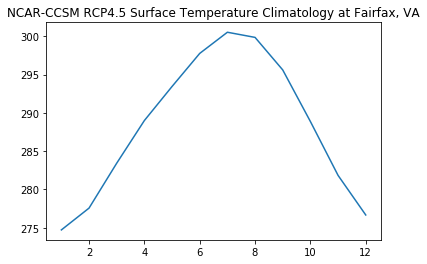

In [59]:
plt.plot(ds_climopt['month'],ds_climopt['ts'][0:12])
plt.title('NCAR-CCSM RCP4.5 Surface Temperature Climatology at Fairfax, VA')

Plot the Anomalies

Text(0.5,1,'NCAR-CCSM RCP4.5 Surface Temperature Anomalies at Fairfax, VA')

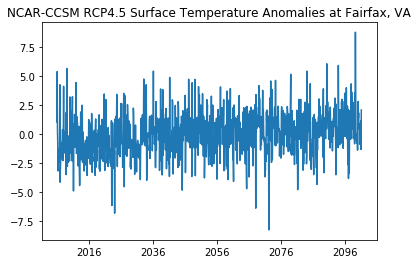

In [60]:
plt.plot(ds_anomspt['time'],ds_anomspt['ts'])
plt.title('NCAR-CCSM RCP4.5 Surface Temperature Anomalies at Fairfax, VA')

## Make Hovmoller Diagram of EQ Pacific SST Anomalies 

We will use `xarray` sel and slice to extract 5S-5N, 60-290 and mean to average over the latitudes

In [61]:
eqpac=ds_anoms.sel(lon=slice(60,290),lat=slice(-5,5)).mean(dim='lat')
eqpac

<xarray.Dataset>
Dimensions:   (bnds: 2, lon: 185, time: 1140)
Coordinates:
  * lon       (lon) float64 60.0 61.25 62.5 63.75 ... 286.2 287.5 288.8 290.0
  * time      (time) datetime64[ns] 2006-01-16T12:00:00 ... 2100-12-16T12:00:00
    month     (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: bnds
Data variables:
    lat_bnds  (time, bnds) float64 dask.array<chunksize=(1, 2), meta=np.ndarray>
    lon_bnds  (time, lon, bnds) float64 dask.array<chunksize=(1, 185, 2), meta=np.ndarray>
    ts        (time, lon) float32 dask.array<chunksize=(1, 185), meta=np.ndarray>

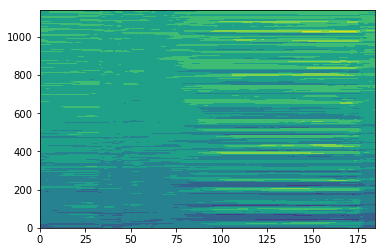

In [62]:
plt.contourf(eqpac['ts'])

## Calculate the Nino3.4 Index

We can use `xarray` sel, slice, and mean to calculate the Nino3.4 index by taking the mean over multiple dimensions

In [65]:
ds_nino34=ds_anoms.sel(lat=slice(-5,5),lon=slice(190,240)).mean(['lat','lon'])

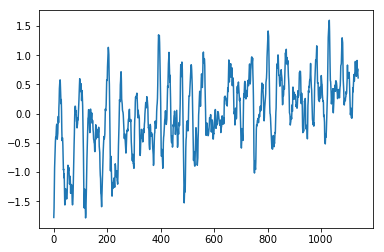

In [66]:
plt.plot(ds_nino34['ts'])